## <center>Gradient Boosting and GridSearch</center>


### The Data

Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/Tree Methods/Data Sets/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Data preparation

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

### Gradient Boosting and Grid Search with CV

The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [8]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [9]:
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

##### Fit to Training Data with CV Search

In [10]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [11]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

#### Performance 

In [12]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [13]:
predictions = grid.predict(X_test)

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [15]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.08909069e-16, 0.00000000e+00, 0.00000000e+00,
       9.47714930e-17, 1.04652037e-03, 3.54080954e-18, 3.78276239e-06,
       1.49025870e-17, 0.00000000e+00, 9.07138084e-18, 0.00000000e+00,
       3.80022672e-17, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.31055039e-03, 5.40312117e-02, 6.24175887e-04, 1.72212083e-02,
       1.82499853e-02, 5.69834384e-06, 6.14744334e-01, 5.61116517e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25278108e-02,
       1.10336631e-02, 0.00000000e+00, 9.35676856e-17, 0.00000000e+00,
       1.34073602e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.88148525e-17, 0.00000000e+00, 3.48206312e-17, 4.37974393e-18,
       1.18312069e-05, 2.07086313e-04, 1.35970285e-01, 3.02822984e-03,
       5.23459340e-02, 7.95843895e-04, 7.70422757e-06, 4.95063766e-06,
       3.60117275e-05, 5.62862863e-04, 1.37895714e-02, 2.09095538e-03,
       0.00000000e+00, 0.00000000e+00, 1.23142722e-03, 0.00000000e+00,
      

In [16]:
feat_import = grid.best_estimator_.feature_importances_

In [18]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.089091e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.477149e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.962105e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [19]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.054031
stalk-root_r,0.052346
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_w,0.000000
gill-attachment_f,0.000000
veil-color_o,0.000000
veil-color_w,0.000000


In [20]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064716,0.0,0.0,2.962105e-16,0.00071,0.614744


In [21]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [22]:
imp_feats.sort_values('Importance')

,Importance
stalk-surface-below-ring_s,0.000563
odor_c,0.000624
stalk-surface-above-ring_k,0.000796
cap-surface_g,0.001047
stalk-color-above-ring_n,0.001231
ring-type_p,0.001363
ring-type_n,0.001454
stalk-color-above-ring_w,0.001491
stalk-color-above-ring_c,0.002091
cap-color_y,0.002311


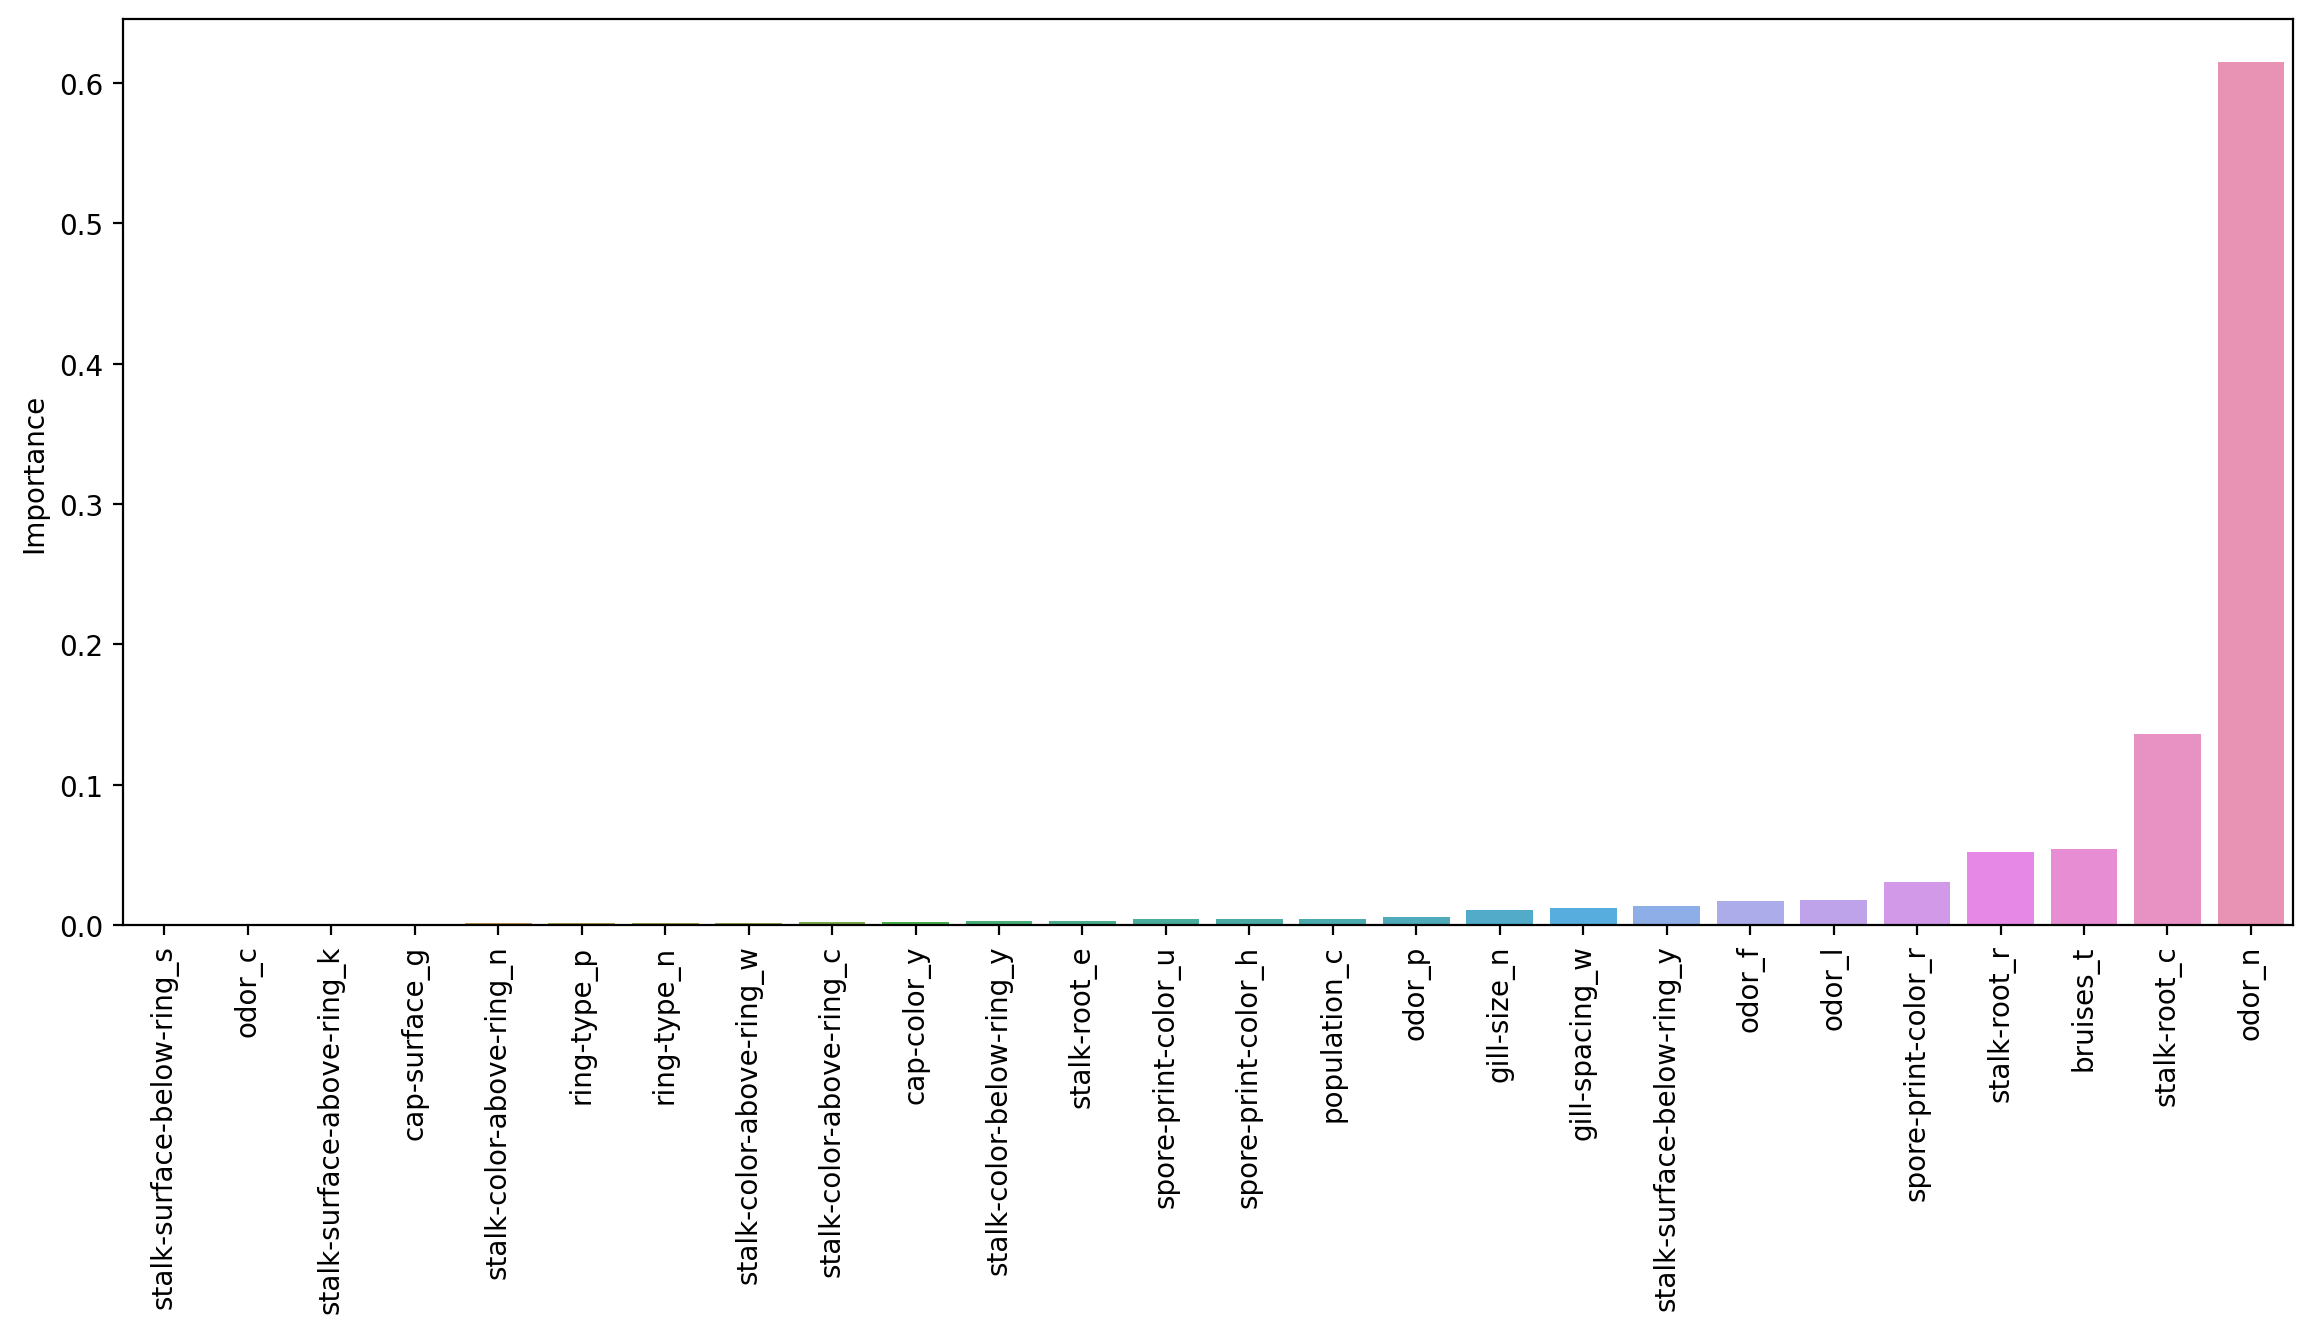

In [23]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);